<a href="https://colab.research.google.com/github/lequanngo/Bitcoin/blob/master/PredictBitcoin_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import data from github

In [0]:
df= pd.read_csv('https://raw.githubusercontent.com/lequanngo/Bitcoin/master/BTC-USD.csv', index_col='Date')

Check the dataset

In [0]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-02-26,237.337006,237.710007,234.257004,236.425995,236.425995,13619400
2015-02-27,236.436005,256.653015,236.436005,253.828003,253.828003,44013900
2015-02-28,253.520004,254.692001,249.479004,254.263000,254.263000,13949300
2015-03-01,254.283005,261.660004,245.932999,260.201996,260.201996,25213700
2015-03-02,260.356995,276.300995,258.312988,275.670013,275.670013,40465700


In [0]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-22,9687.707031,9698.231445,9600.728516,9663.181641,9663.181641,35838025154
2020-02-23,9663.318359,9937.404297,9657.791016,9924.515625,9924.515625,41185185761
2020-02-24,9921.583008,9951.746094,9537.042969,9650.174805,9650.174805,45080496648
2020-02-25,9651.312500,9652.737305,9305.021484,9341.705078,9341.705078,42515259129
2020-02-26,9338.290039,9354.778320,8704.426758,8820.522461,8820.522461,50420050761


Remove Adj Close and Volume Columns

In [0]:
df.drop(columns=['Adj Close','Volume'])

,Open,High,Low,Close
Date,,,,
2015-02-26,237.337006,237.710007,234.257004,236.425995
2015-02-27,236.436005,256.653015,236.436005,253.828003
2015-02-28,253.520004,254.692001,249.479004,254.263000
2015-03-01,254.283005,261.660004,245.932999,260.201996
2015-03-02,260.356995,276.300995,258.312988,275.670013
...,...,...,...,...
2020-02-22,9687.707031,9698.231445,9600.728516,9663.181641
2020-02-23,9663.318359,9937.404297,9657.791016,9924.515625
2020-02-24,9921.583008,9951.746094,9537.042969,9650.174805


Plot the dataset

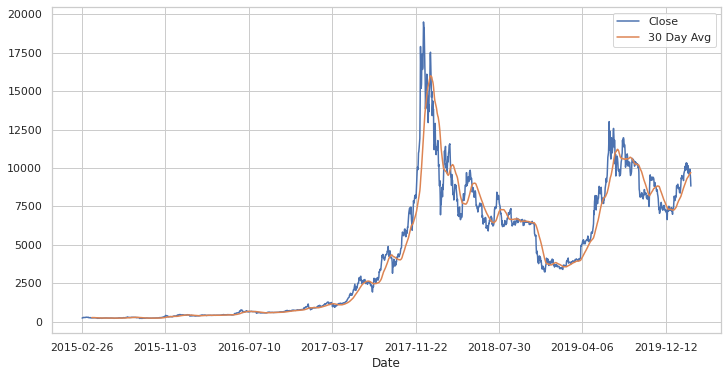

In [0]:
sns.set()
sns.set_style('whitegrid')
df['Close'].plot(figsize=(12,6),label='Close')
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

Calculate the average

In [0]:
df['average']=(df['High']+df['Low']+df['Open']+df['Close'])/4

In [0]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,average
Date,,,,,,,
2015-02-26,237.337006,237.710007,234.257004,236.425995,236.425995,13619400,236.432503
2015-02-27,236.436005,256.653015,236.436005,253.828003,253.828003,44013900,245.838257
2015-02-28,253.520004,254.692001,249.479004,254.263000,254.263000,13949300,252.988502
2015-03-01,254.283005,261.660004,245.932999,260.201996,260.201996,25213700,255.519501
2015-03-02,260.356995,276.300995,258.312988,275.670013,275.670013,40465700,267.660248


Add a new column that takes the value from 'Close' column and drop 

In [0]:
df['Price_after_month']=df['Close'].shift(-30)

In [0]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,average,Price_after_month
Date,,,,,,,,
2020-02-22,9687.707031,9698.231445,9600.728516,9663.181641,9663.181641,35838025154,9662.462158,NaN
2020-02-23,9663.318359,9937.404297,9657.791016,9924.515625,9924.515625,41185185761,9795.757324,NaN
2020-02-24,9921.583008,9951.746094,9537.042969,9650.174805,9650.174805,45080496648,9765.136719,NaN
2020-02-25,9651.312500,9652.737305,9305.021484,9341.705078,9341.705078,42515259129,9487.694092,NaN
2020-02-26,9338.290039,9354.778320,8704.426758,8820.522461,8820.522461,50420050761,9054.504394,NaN


In [0]:
from sklearn import preprocessing

In [0]:
df.dropna(inplace=True)
X = df.drop('Price_after_month', axis=1)
X = preprocessing.scale(X)
y = df['Price_after_month']

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [0]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 88.5427 %


In [0]:
preds = reg.predict(X_test)
print("The prediction is:",preds[1],"But the real value is:" ,y_test[1])

The prediction is: 251.9320551950003 But the real value is: 269.02999900000003


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1797 entries, 2015-02-26 to 2020-01-27
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               1797 non-null   float64
 1   High               1797 non-null   float64
 2   Low                1797 non-null   float64
 3   Close              1797 non-null   float64
 4   Adj Close          1797 non-null   float64
 5   Volume             1797 non-null   int64  
 6   average            1797 non-null   float64
 7   Price_after_month  1797 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 206.4+ KB


In [0]:
X_30=X[-30:]

In [0]:
forecast = reg.predict(X_30)

For Random Forest

In [0]:
df1 = pd.DataFrame(forecast,columns=['Forecast'],index=date)

In [0]:
df2=df.append(df1)

In [0]:
df2.tail(5)

,Open,High,Low,Close,Adj Close,Volume,average,Price_after_month,Forecast
2020-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9749.171917
2020-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9591.873801
2020-02-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9346.783858
2020-02-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9408.416721
2020-02-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9110.172185


In [0]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,average,Price_after_month,Forecast
2015-02-26,237.337006,237.710007,234.257004,236.425995,236.425995,13619400.0,236.432503,252.798004,NaN
2015-02-27,236.436005,256.653015,236.436005,253.828003,253.828003,44013900.0,245.838257,242.712997,NaN
2015-02-28,253.520004,254.692001,249.479004,254.263000,254.263000,13949300.0,252.988502,247.526001,NaN
2015-03-01,254.283005,261.660004,245.932999,260.201996,260.201996,25213700.0,255.519501,244.223999,NaN
2015-03-02,260.356995,276.300995,258.312988,275.670013,275.670013,40465700.0,267.660248,247.272003,NaN


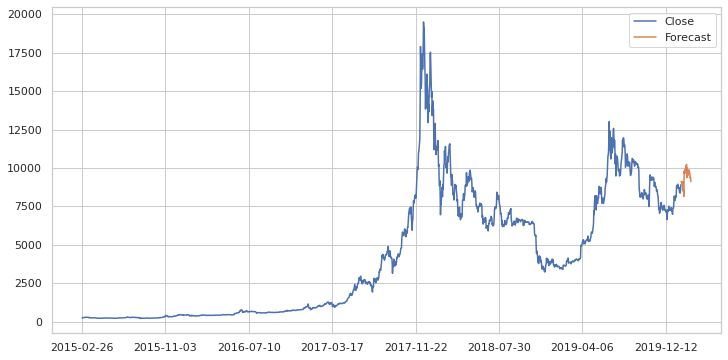

In [0]:
df2['Close'].plot(figsize=(12,6),label='Close')
df2['Forecast'].plot(label='Forecast')
plt.legend()

In [0]:
df2.tail()

,Open,High,Low,Close,Adj Close,Volume,average,Price_after_month,Forecast
2020-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9749.171917
2020-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9591.873801
2020-02-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9346.783858
2020-02-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9408.416721
2020-02-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9110.172185


In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
dtr = DecisionTreeRegressor()

In [0]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
accuracy1=dtr.score(X_test,y_test)
accuracy1=accuracy1*100
accuracy1 = float("{0:.4f}".format(accuracy1))
print('Accuracy is:',accuracy1,'%')

Accuracy is: 84.3953 %


In [0]:
preds1 = dtr.predict(X_test)
print("The prediction is:",preds1[1],"But the real value is:" ,y_test[1])

The prediction is: 256.335999 But the real value is: 269.02999900000003


In [0]:
forecast1 = dtr.predict(X_30)

In [0]:
df3 = pd.DataFrame(forecast1,columns=['Forecast'],index=date)

In [0]:
df4 = df.append(df3)

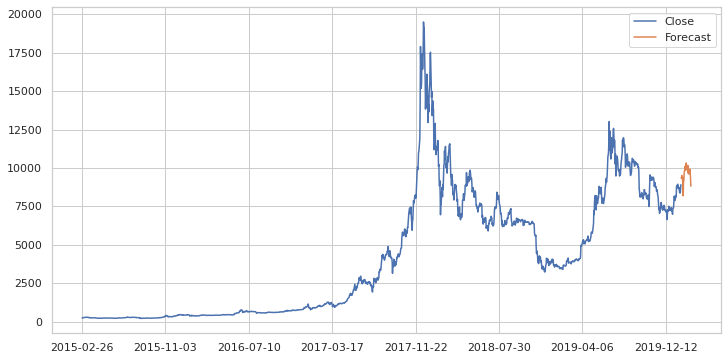

In [0]:
df4['Close'].plot(figsize=(12,6),label='Close')
df4['Forecast'].plot(label='Forecast')
plt.legend()

In [0]:
df4.tail()

,Open,High,Low,Close,Adj Close,Volume,average,Price_after_month,Forecast
2020-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9663.181641
2020-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9924.515625
2020-02-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9650.174805
2020-02-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9341.705078
2020-02-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8820.522461
